In [162]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.use("nbagg")  

## Блок 1. Задаем потенциал и параметры сетки
## $\frac{U(\varphi)}{E_J}=\frac{(\varphi_x-\varphi)^2}{2l_q}+(1-\cos\varphi)$

In [163]:
# параметры сетки + значение phi
S = 5000 #размерность матрицы    
dx = 0.01 
L = dx*(S+2)# длина ящика для нулевых краевых условий
phix = np.pi/2 #при построение потенциала обл определения должна сдвигаться на phi
x = np.linspace(-L/2+dx+phix, L/2-dx+phix, S) # список x_i от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
print('dx = {}, L = {}'.format(dx, L))
# параметры графика
width = 8
high = 6
#h = 1, m = 1

dx = 0.01, L = 50.02


In [164]:
lq = 3
EJ = 1
 
def U(phi):
    return (phix - phi)**2/(2*lq) + 1 - np.cos(phi)

v = U(x)
# вывод графика потенциала
#plt.figure(figsize=(width,high))
#plt.plot(x, v, color="green", label="V(x)")       
#plt.title("SQUID potential")
#plt.show()  

In [165]:
# надо получить значение, по которому будем получать E_max
# условие: энергия не должна превышать значение потенциала на концах
# решение: U_com = min(v[0], v[S-1])
U_comp = min(v[0], v[S-1])
print(U_comp)

105.0343149165689


## Блок 2. Собственные векторы и собственные значения
 

In [166]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 10105.299018416765 10105.225592312208 10105.03431491657


In [167]:
eigvals, eigvecs = np.linalg.eigh(h)

In [168]:
np.sum(np.abs(eigvecs[8])**2)

0.9999999999999994

In [ ]:
# построение зависимости энергии от номера уровня
# полезна чтобы на глас определить примерный уровень отсечения
#plt.figure(figsize=(width,high))
#plt.plot(eigvals)
#plt.xlabel("n",size=14)
#plt.ylabel("En",size=14)
#plt.title("All energy levels")
#plt.show()

### ???
### Отсечение

In [169]:
# отступ от края должен быть постоянным или зависить от U_comp?
border = 5     # 0.05*U_comp
eigvals_new = list(filter(lambda x: x < U_comp - border, eigvals))
#print(eigvals_new)
N_trunc = len(eigvals_new) # уровень отсечения
print('Уровень отсечения N_trunc = {}'.format(N_trunc))

Уровень отсечения N_trunc = 172


In [170]:
 #построение psi_(N_trunc)
num = N_trunc
plt.figure(figsize=(width, high))
y = []
y = eigvecs[:,num]+eigvals[num]
    #y = np.append(y,0)
    #y = np.insert(y,0,0)
    #plt.plot(x, v) # строит график в соотношении с потенциалом
plt.plot(x, plt.plot(x, ,lw=3, label="{} ".format(num))
,lw=3, label="{} ".format(num))
plt.xlabel('x', size=14)
plt.ylabel('$\psi(x_n)$',size=14)
    plt.legend()
plt.title('last satisfactory wavefunction for a SQUID using FDM',size=14)
plt.show()

# все-таки не хватает качественного критерия оценки волновой функции. они все нормированы по построению

SyntaxError: invalid syntax (<ipython-input-170-8867c6f23951>, line 9)

## ???
Если мы рассматриваем случай нулевой температуры, распределение Больцмана теряет смысл в задаче (речь о зависимости от "реальной" температуры). Как получить расновестную матрицу плотности такой системы?
В моем пониимании, это просто матрица размерности N_trunc$\times$N_trunc с единичным первым диагональным элементом

## Заселяем произвольный уровень

Есть два варианта: либо поместить в чистое состояние, либо в суперпозицию. Начнем с первого.

In [171]:
n_init = 23 # начальный уровень
rho_init = np.zeros([N_trunc, N_trunc])
rho_init[n_init][n_init] = 1

<IPython.core.display.Javascript object>


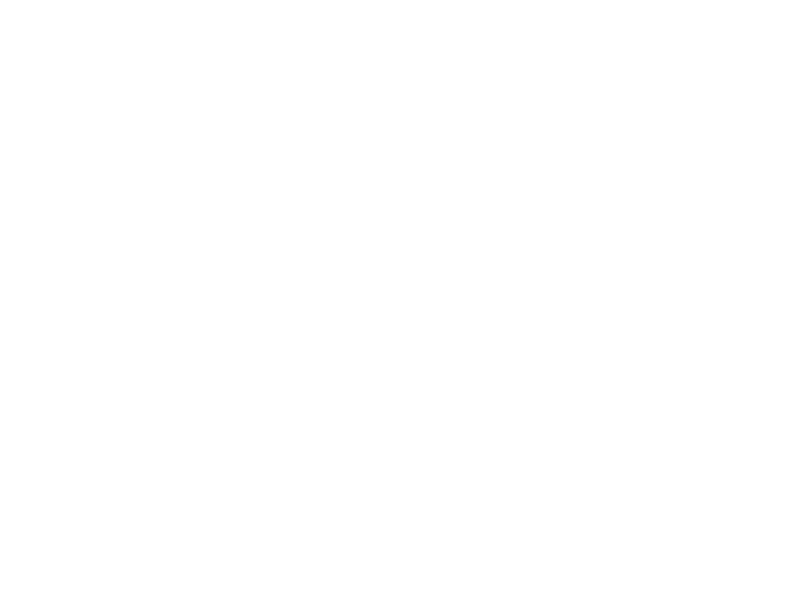

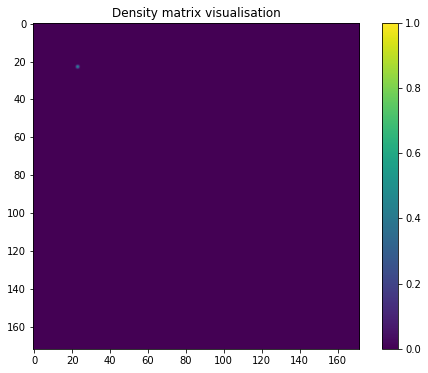

In [172]:
plt.figure(figsize=(width,high))
plt.imshow(rho_init, interpolation="bicubic")
plt.title("Density matrix visualisation")
plt.colorbar()
plt.show()
#rho_init

### Блок 3. Матрицы скоростей затухания
### $W_{mn}=\frac{2\pi}{\hbar^{2}}\left|<n|\hat{x}|m>\right|^2g(\omega_{m,n})k^2(\omega_{m,n})$

From Blum:

### $\frac{W_{mn}}{W_{nm}} = \frac{exp(-\beta E_m)}{exp(-\beta E_n)} \rightarrow W_{mn} = W_{nm}*exp(-\beta(E_m - E_n))$

## ???
1. Из вывода матричного алгоритма $\psi_i = \psi(x_i)$ - считается, что собственные векторы данной матрицы являются значением волновой функции в соответствующей точке.

2. В результате применения пакета linalg выполняется $\sum{\psi^2_i} = 1$. Следовательно, $\psi^2_i$ - вероятность обнаружить частицу в окресности dx точки $x_i$

3. Из теории эта же вероятность через непрерывную (реальную) полновую функцию равна $\psi^2(x_i)dx$. 
   Напрашивается соответствие $\psi_i = \psi(x_i)\sqrt{dx}$.

4. Имеет ли право на жизнь цепочка: 
    Если $\int\left|\psi(x)\right|^2dx = 1 \rightarrow \sum{\psi^2_i} = 1$, 
    то $\int\psi_n(x)x\psi_m(x)dx \rightarrow \sum{\psi_n(x_i)x_i\psi_m(x_i)}$?
    (Тут использовалось обозначение $\psi_i = \psi(x_i)$)

5. $<n|\hat{x}|m> = \sum_{i=0}^{S-1}{\psi_n(x_i)x_i\psi_m(x_i)}$

$\dot{\rho} = \text{прирост в }|m> - \text{ убыль из }|m>$.
Запрещены переходы к более высокому уровню. То есть в $W_{ij}$ всегда $i<j$: треугольная матрица с заполненным верхним правым углом. 

 

In [173]:
gamma = 0.05 
const = gamma*2*np.pi
###############################################
# возвращает квадрат модуля матричного элемента x
###############################################

def squred_abs(n, m, x): 
    n_ket = eigvecs[n]
    m_bra = eigvecs[m] 
    integ = sum(n_ket*x*m_bra)
    return np.abs(integ)**2
#print(squred_abs(1, 2, x))

################################################
# Заполнение матриц W
################################################
W = np.zeros([N_trunc, N_trunc])
for i in range(N_trunc):
    for j in range(N_trunc):
        if i<j: 
            W[i][j] = const*squred_abs(j, i, x)

<IPython.core.display.Javascript object>


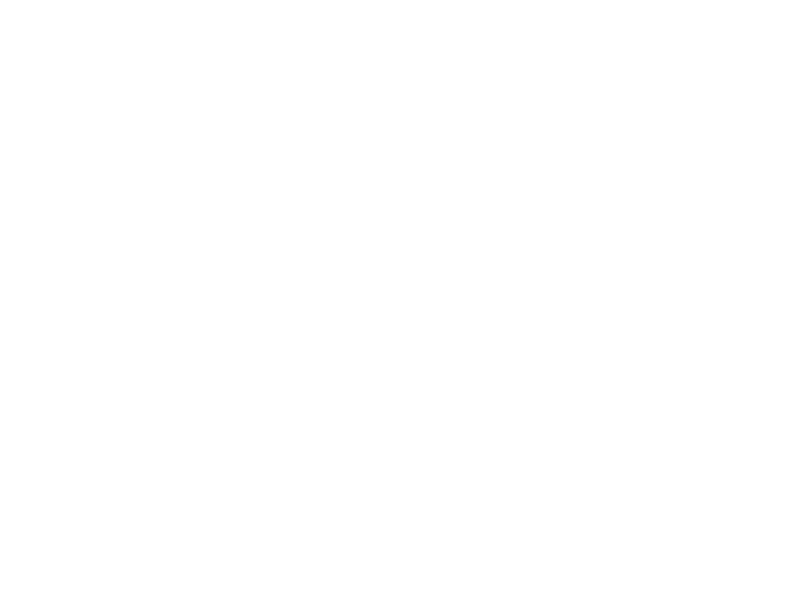

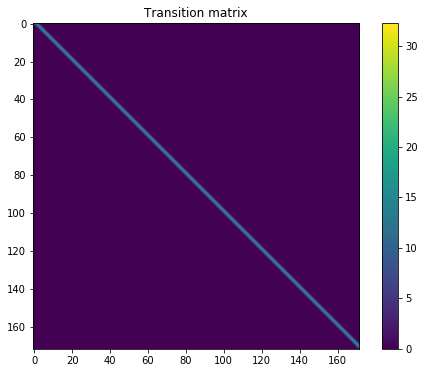

In [174]:
plt.figure(figsize=(width,high))
plt.imshow(W, interpolation="bicubic")
plt.title("Transition matrix")
plt.colorbar()
plt.show()

$W_m = \sum_{n}W_{nm}$ 

<IPython.core.display.Javascript object>


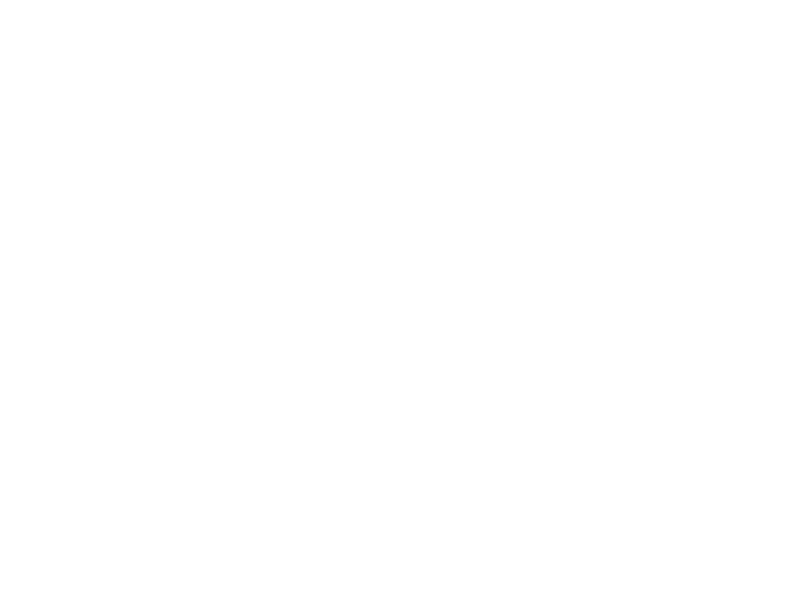

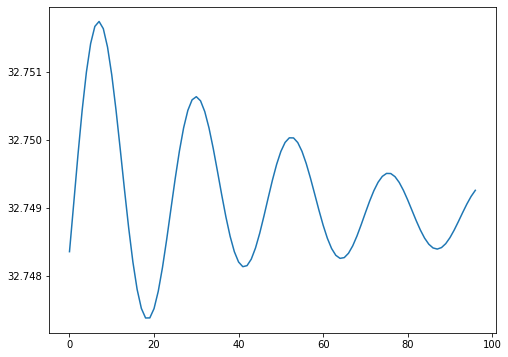

In [180]:
def Wm(W):
    w = []
    for m in range(N_trunc):
        s = 0
        for n in range(N_trunc):
            s += W[n][m]
        w.append(s)
    return w
lis = Wm(W)

plt.figure(figsize=(width, high))
plt.plot(lis[75:])       
plt.show()


### Уравнение Паули
$\dot{\rho}(t)_{mm} = \sum_{n \neq m}{\rho(t)_{nn}W_{mn}} - \rho(t)_{mm}\sum_{n \neq m}{W_{nm}}$

### Алгоритм
Обозначения:
$\rho^{t-1}$= rho_old, $\rho^{t} =$ rho_curr, $\rho^{t+1} =$rho_new; 

$\frac{d\rho}{dt} = \frac{\rho^{t+1} - \rho^{t-1}}{2dt}$

$\rho^{t+1}_{mm} = \rho^{t-1}_{mm} + 2dt\left( \sum_{n}{\rho^t_{nn}W_{mn}} -\rho^t_{mm}\sum_n{W_{nm}}\right)$

<IPython.core.display.Javascript object>


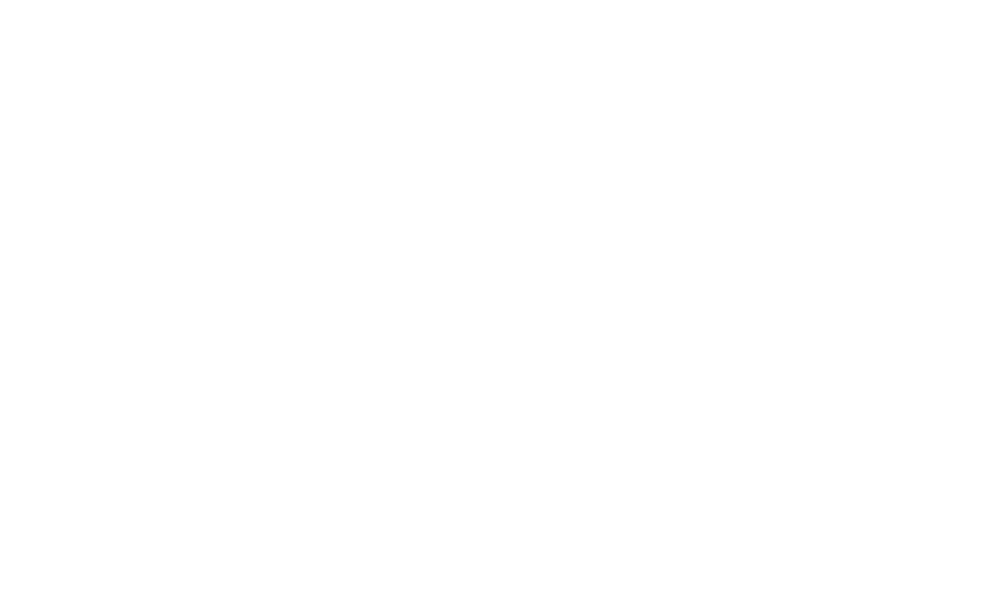

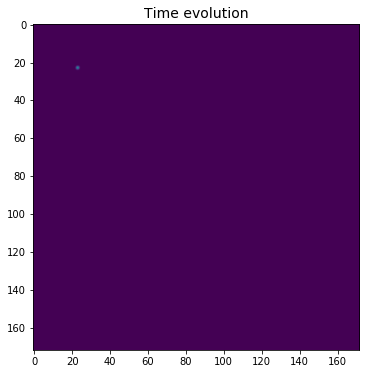

In [181]:
# Initialize animated plot
# ---------------------------------------------------------------
fig = plt.figure(figsize=(10,6))
plt.imshow(rho_init, interpolation="bicubic")
plt.title('Time evolution', size=14)
plt.ion()   # set interective mode
plt.show()

In [192]:
# # rho_curr находим из разностной схемы первого порялка точности
# матричное уравнение перепишется в виде векторного для столбца rho
############################################
dt = 0.000005
L = 0.0005 # длина всего интервала времени за исключением двух первых шагов
nt = int(L/dt)
iplot = nt/10 # строим каждый десятый снэп
print("Количество итераций по времени: {}".format(nt))

def pauli_vec_func(rho, W):  
    res = []
    for m in range(N_trunc):
        plus = 0
        minus = 0
        for n in range(N_trunc):
            plus += rho[n]*W[m][n]
            minus += W[n][m]
        minus = minus*rho[m]
        res.append(plus - minus)
    return np.array(res)

############################################
# функция превращения столбца в матрицу
############################################

def plot_func(rhoo):
    rho_plot = np.zeros([N_trunc, N_trunc])
    for k in range(N_trunc):
        rho_plot[k][k] = rho_new[k]
    return rho_plot


rho_old = np.array([rho_init[i][i] for i in range(N_trunc)])
rho_curr = rho_old + dt*pauli_vec_func(rho_old, W)
rho_new = np.zeros([N_trunc])
for t in range(nt):
    rho_new = rho_old - 2*dt*pauli_vec_func(rho_curr, W)
    
    """if not t % iplot:                    
        # Display Solution
        # -------------------------------------- 
        rho_plot = plot_func(rho_curr)
        plt.imshow(rho_plot, interpolation="bicubic") 
        plt.title("T = {}".format(t*dt))
        plt.gcf().canvas.draw()"""
    
    rho_old = rho_curr
    rho_curr = rho_new

Количество итераций по времени: 100


<IPython.core.display.Javascript object>


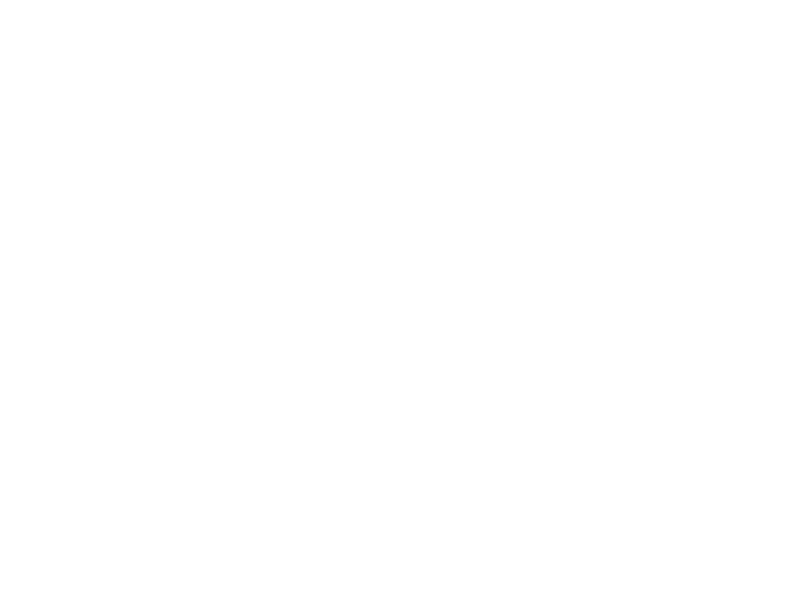

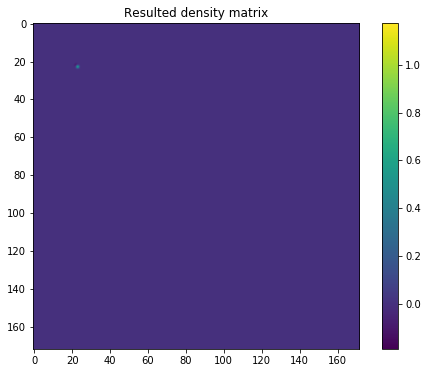

In [190]:
rho_plot = plot_func(rho_new)
plt.figure(figsize=(width,high))
plt.imshow(rho_plot, interpolation="bicubic")
plt.title("Resulted density matrix")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


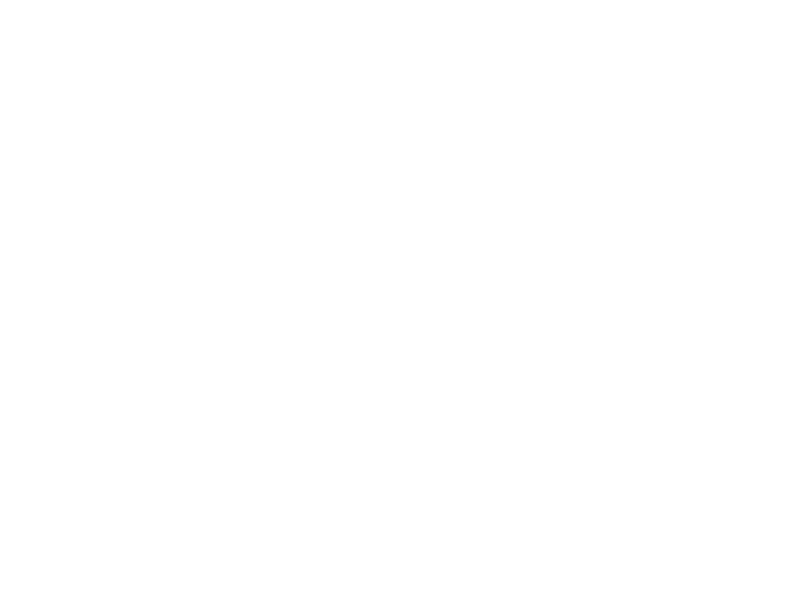

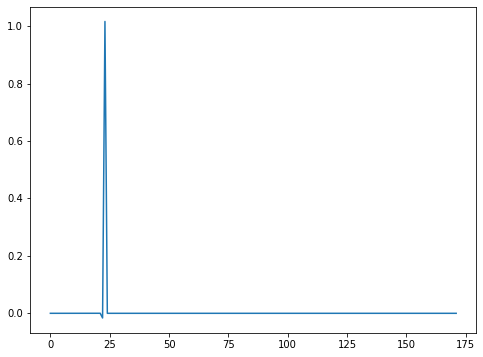

In [193]:
plt.figure(figsize=(width, high))
plt.plot(rho_new)       
plt.show() 

In [194]:
np.sum(rho_new)

0.9999999999999992